**a)** Construya una funci´on que cargue todos los datos de entrenamiento y pruebas del problema generando
como salida: (i) dos matrices Xtr, Ytr, correspondientes a las im´agenes y etiquetas de entrenamiento,
(ii) dos matrices Xt, Yt, correspondientes a las im´agenes y etiquetas de pruebas, y finalmente (iii) dos
matrices Xv, Yv, correspondientes a im´agenes y etiquetas que se usar´an como conjunto de validaci´on, es
decir para tomar decisiones de dise˜no acerca del modelo. Este ´ultimo conjunto debe ser extra´ıdo desde
el conjunto de entrenamiento original y no debe superar las 7000 im´agenes.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
def load_data():
    train = pd.read_csv('data/sign_mnist_train.csv')
    test = pd.read_csv('data/sign_mnist_test.csv')
    (train_set, validation_set) = train_test_split(train, test_size=7000, random_state=8500)
    
    y_tr = train_set['label']
    x_tr = train_set.iloc[:, 1:]
    
    y_t = test['label']
    x_t = test.iloc[:, 1:]
    
    y_v = validation_set['label']
    x_v = validation_set.iloc[:, 1:]

    return(x_tr,x_v,x_t,y_tr,y_v,y_t)
x_tr, x_v, x_t, y_tr, y_v , y_t = load_data()

**b)** Construya una funci´on que escale apropiadamente las im´agenes antes de trabajar. Experimente s´olo
escalando los datos de acuerdo a la intensidad m´axima de pixel (i.e., dividiendo por 255) y luego
centrando y escal´andolos como en actividades anteriores

In [3]:
def scale_by_max_pixel(x_set):
    return x_set/255


# Finish this one!
def center_and_scale(x_set):
    return x_set
x_tr = scale_by_max_pixel(x_tr)
x_t = scale_by_max_pixel(x_t)
x_v = scale_by_max_pixel(x_v)

**c)** Dise˜ne, entrene y eval´ue una red neuronal para el problema partir de la representaci´on original de las
im´agenes. Experimente con distintas arquitecturas, pre-procesamientos y m´etodos de entrenamiento, midiendo el error de clasificaci´on sobre el conjunto de validaci´on. En base a esta ´ultima medida de
desempe˜no, decida qu´e modelo, de entre todos los evaluados, medir´a finalmente en el conjunto de test.
Reporte y discuta los resultados obtenidos. Se espera que logre obtener un error de pruebas menor o
igual a 0.2.

### Network 1

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

# Creación de red secuencial
model = Sequential()
model.add(Dense(30, input_dim=x_tr.shape[1], init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu'))
model.add(Dense(25, init='uniform', activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_tr.values, to_categorical(y_tr), nb_epoch=100, batch_size=128, verbose=1,
validation_data=(x_v.values,to_categorical(y_v)))

Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="softmax", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/keras/m

Train on 20455 samples, validate on 7000 samples
Epoch 1/100
20455/20455 [==============================] - 1s 56us/step - loss: 3.0948 - acc: 0.0777 - val_loss: 2.8797 - val_acc: 0.1133
Epoch 2/100
20455/20455 [==============================] - 1s 43us/step - loss: 2.7927 - acc: 0.1252 - val_loss: 2.7313 - val_acc: 0.1384
Epoch 3/100
20455/20455 [==============================] - 1s 42us/step - loss: 2.6680 - acc: 0.1569 - val_loss: 2.5864 - val_acc: 0.1934
Epoch 4/100
20455/20455 [==============================] - 1s 42us/step - loss: 2.4733 - acc: 0.2086 - val_loss: 2.3807 - val_acc: 0.2271
Epoch 5/100
20455/20455 [==============================] - 1s 43us/step - loss: 2.3196 - acc: 0.2376 - val_loss: 2.2874 - val_acc: 0.2571
Epoch 6/100
20455/20455 [==============================] - 1s 43us/step - loss: 2.2344 - acc: 0.2579 - val_loss: 2.2137 - val_acc: 0.2714
Epoch 7/100
20455/20455 [==============================] - 1s 42us/step - loss: 2.1752 - acc: 0.2752 - val_loss: 2.1532 - v

20455/20455 [==============================] - 1s 41us/step - loss: 0.5310 - acc: 0.8212 - val_loss: 0.5325 - val_acc: 0.8156
Epoch 60/100
20455/20455 [==============================] - 1s 45us/step - loss: 0.5158 - acc: 0.8251 - val_loss: 0.6677 - val_acc: 0.7560
Epoch 61/100
20455/20455 [==============================] - 1s 44us/step - loss: 0.5000 - acc: 0.8329 - val_loss: 0.4926 - val_acc: 0.8401
Epoch 62/100
20455/20455 [==============================] - 1s 41us/step - loss: 0.4917 - acc: 0.8327 - val_loss: 0.4671 - val_acc: 0.8479
Epoch 63/100
20455/20455 [==============================] - 1s 43us/step - loss: 0.4789 - acc: 0.8364 - val_loss: 0.4633 - val_acc: 0.8447
Epoch 64/100
20455/20455 [==============================] - 1s 42us/step - loss: 0.4674 - acc: 0.8390 - val_loss: 0.5168 - val_acc: 0.8250
Epoch 65/100
20455/20455 [==============================] - 1s 43us/step - loss: 0.4534 - acc: 0.8458 - val_loss: 0.5164 - val_acc: 0.8253
Epoch 66/100
20455/20455 [==============

In [6]:
from sklearn.metrics import accuracy_score
y_t_pred = model.predict(x_t)

print(y_t_pred)
#accuracy_score(y_t, y_t_pred)


[[  0.00000000e+00   3.32073126e-28   4.67418395e-05 ...,   7.46003329e-11
    5.98884897e-09   5.29813216e-12]
 [  2.03693594e-15   2.07727298e-01   1.32686917e-10 ...,   1.88328996e-02
    1.08460430e-03   3.81185295e-04]
 [  4.98152877e-31   1.89220931e-10   4.30337736e-18 ...,   1.77908601e-06
    6.94260294e-08   2.06336088e-04]
 ..., 
 [  0.00000000e+00   0.00000000e+00   9.99354184e-01 ...,   1.12837481e-25
    2.87218469e-12   1.83773519e-31]
 [  2.86806039e-12   5.67856906e-20   4.34892465e-15 ...,   1.47701203e-32
    3.09394434e-17   4.15056241e-31]
 [  0.00000000e+00   0.00000000e+00   9.99555647e-01 ...,   1.73227353e-26
    1.60276274e-12   3.30326961e-32]]


### Network 2

**d)** Para la mejor red entrenada anteriormente construya la matriz de confusi´on de las distintas clases, para
asi visualizar cu´ales son las clases m´as dif´ıciles de clasificar y con cu´ales se confunden. Comente.

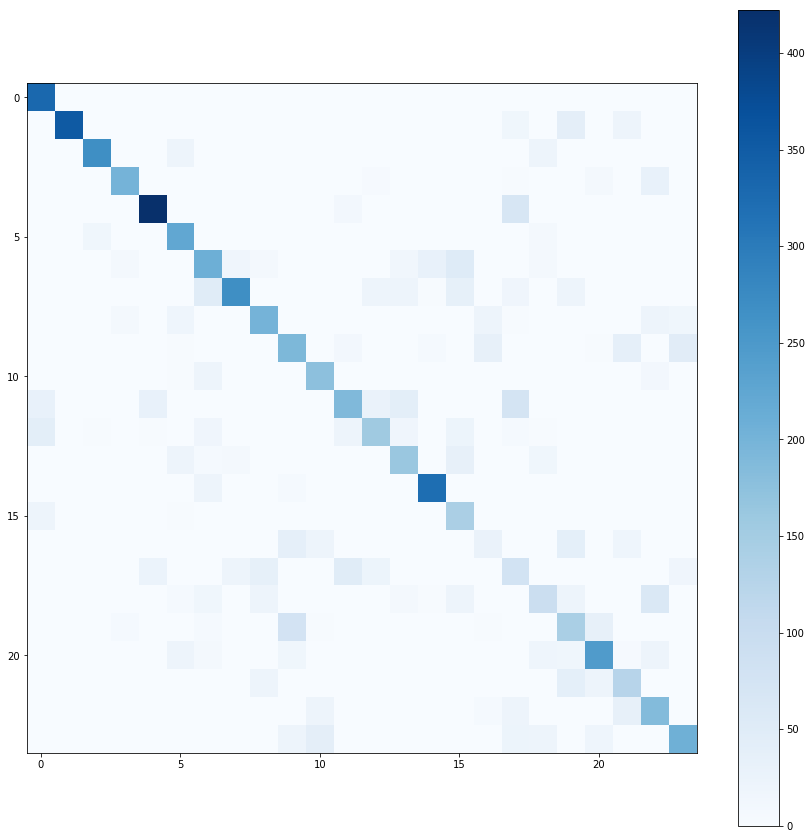

In [17]:

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
y_t_predict = model.predict_classes(x_t.values)
cm = confusion_matrix(y_t, y_t_predict)
    
plt.figure(figsize=(15, 15))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

**e)** Entrene una SVM no lineal sobre los pixeles con y sin pre-procesamiento. Puede utilizar el conjunto de
validaci´on para seleccionar hiper-par´ametros, como el nivel de regularizaci´on aplicado y/o la funci´on
de kernel a utilizar.

##### Sin procesamiento

In [ ]:
from sklearn.svm import SVC as SVM
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

def train_svm(param):
    model = SVM()
    model.set_params(C=param, kernel='rbf')
    model.fit(x_tr, y_tr)

    y_tr_pred = model.predict(x_tr)
    y_v_pred = model.predict(x_v)

    train_error = (1-accuracy_score(y_tr, y_tr_pred))
    test_error = (1-accuracy_score(y_v, y_v_pred))
    
    return (train_error, test_error)

def graph_svm_range(params):
    train_errors = []
    test_errors = []

    for depth in params:
        print('Trying param %f' % depth)
        (train, test) = train_svm(depth)
        train_errors.append(train)
        test_errors.append(test)

    plt.figure(figsize=(10, 8))
    plt.plot(params, train_errors, label="Train Error")
    plt.plot(params, test_errors, label="Test Error")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('RBF')
    plt.ylabel('Error')
    plt.show()
    
params = np.arange(0.001, 1.0, 0.05)
graph_svm_range(params)

Trying param 0.001000


##### Con procesamiento

**f)** Entrene una ´arbol de clasificaci´on sobre los pixeles con y sin pre-procesamiento. Puede utilizar el
conjunto de validaci´on para seleccionar hiper-par´ametros, como la profundidad m´axima del ´arbol.

In [ ]:
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

def train_tree(depth):
    # Entrenar el árbol
    model = Tree()
    model.set_params(max_depth=depth, criterion='gini', splitter='best')
    model.fit(Xtrain, Ytrain)

    y_tr_pred = model.predict(x_tr)
    y_v_pred = model.predict(x_v)


    train_error = (1-accuracy_score(y_tr, Y_tr_pred))
    test_error = (1-accuracy_score(y_v, y_v_pred))

    return (train_error, test_error)

def graph_tree_range(params):
    train_errors = []
    test_errors = []

    for depth in params:
        print('Trying depth %d' % depth)
        (train, test) = train_tree(depth)
        train_errors.append(train)
        test_errors.append(test)

    plt.figure(figsize=(10, 8))
    plt.plot(params, train_errors, label="Train Error")
    plt.plot(params, test_errors, label="Test Error")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Profundidad del árbol')
    plt.ylabel('Error')
    plt.show()
    
params = np.arange(1, 20, 1)
graph_tree_range(params)